<a href="https://colab.research.google.com/github/adrianoaandrade/adrianoaandrade/blob/main/NASA_MDP_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#"""
#NASA CM1 Dataset - Software Metrics and Defect Prediction Analysis
#Based on NASA Metrics Data Program (MDP) - CM1 Dataset
#ML Models: AdaBoost, Random Forest, PCA-LDA

#This script performs:
#1. Data loading and preprocessing
#2. Feature engineering and selection
#3. ML model training (AdaBoost, Random Forest, PCA+LDA)
#4. Defect prediction with probability scores
#5. Model performance evaluation
#6. JSON export for web dashboard


import pandas as pd
import numpy as np
import json
import os # Import the os module
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef
)
import warnings
warnings.filterwarnings('ignore')


class NASACM1Analyzer:
    """Main analyzer class for NASA CM1 dataset"""

    def __init__(self, data_path='nasa_cm1_data.csv'):
        """Initialize analyzer with data path"""
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.results = {}

    def load_sample_data(self):
        """Load sample NASA CM1 data (replace with real dataset)"""
        # Sample data matching the dashboard
        data = [
            {"module": "Module 1", "loc": 2450, "v_g": 45, "ev_g": 32, "iv_g": 28, "n": 850, "v": 6500, "l": 0.15, "d": 35, "i": 185, "e": 227500, "b": 2.17, "t": 12639, "lOCode": 2100, "lOComment": 280, "lOBlank": 70, "branchCount": 88, "defects": 1},
            {"module": "Module 2", "loc": 3200, "v_g": 62, "ev_g": 48, "iv_g": 41, "n": 1240, "v": 9800, "l": 0.12, "d": 42, "i": 233, "e": 411600, "b": 3.27, "t": 22867, "lOCode": 2850, "lOComment": 290, "lOBlank": 60, "branchCount": 122, "defects": 1},
            {"module": "Module 3", "loc": 1890, "v_g": 38, "ev_g": 25, "iv_g": 22, "n": 680, "v": 5100, "l": 0.18, "d": 28, "i": 182, "e": 142800, "b": 1.70, "t": 7933, "lOCode": 1650, "lOComment": 195, "lOBlank": 45, "branchCount": 74, "defects": 1},
            {"module": "Module 4", "loc": 2780, "v_g": 54, "ev_g": 39, "iv_g": 35, "n": 1050, "v": 8200, "l": 0.14, "d": 38, "i": 216, "e": 311600, "b": 2.73, "t": 17311, "lOCode": 2400, "lOComment": 320, "lOBlank": 60, "branchCount": 106, "defects": 1},
            {"module": "Module 5", "loc": 1560, "v_g": 29, "ev_g": 18, "iv_g": 16, "n": 520, "v": 3900, "l": 0.21, "d": 22, "i": 177, "e": 85800, "b": 1.30, "t": 4767, "lOCode": 1350, "lOComment": 175, "lOBlank": 35, "branchCount": 56, "defects": 0},
            {"module": "Module 6", "loc": 4100, "v_g": 78, "ev_g": 58, "iv_g": 52, "n": 1580, "v": 12500, "l": 0.10, "d": 52, "i": 240, "e": 650000, "b": 4.17, "t": 36111, "lOCode": 3600, "lOComment": 410, "lOBlank": 90, "branchCount": 154, "defects": 1},
            {"module": "Module 7", "loc": 1200, "v_g": 22, "ev_g": 14, "iv_g": 12, "n": 410, "v": 2950, "l": 0.24, "d": 18, "i": 164, "e": 53100, "b": 0.98, "t": 2950, "lOCode": 1050, "lOComment": 130, "lOBlank": 20, "branchCount": 42, "defects": 0},
            {"module": "Module 8", "loc": 3500, "v_g": 68, "ev_g": 51, "iv_g": 45, "n": 1350, "v": 10700, "l": 0.11, "d": 45, "i": 238, "e": 481500, "b": 3.57, "t": 26750, "lOCode": 3050, "lOComment": 380, "lOBlank": 70, "branchCount": 134, "defects": 1},
            {"module": "Module 9", "loc": 2100, "v_g": 42, "ev_g": 30, "iv_g": 26, "n": 780, "v": 6100, "l": 0.16, "d": 32, "i": 191, "e": 195200, "b": 2.03, "t": 10844, "lOCode": 1850, "lOComment": 210, "lOBlank": 40, "branchCount": 82, "defects": 1},
            {"module": "Module 10", "loc": 980, "v_g": 18, "ev_g": 11, "iv_g": 10, "n": 340, "v": 2400, "l": 0.26, "d": 15, "i": 160, "e": 36000, "b": 0.80, "t": 2000, "lOCode": 860, "lOComment": 105, "lOBlank": 15, "branchCount": 34, "defects": 0},
            {"module": "Module 11", "loc": 2650, "v_g": 51, "ev_g": 37, "iv_g": 33, "n": 980, "v": 7650, "l": 0.13, "d": 36, "i": 207, "e": 275400, "b": 2.55, "t": 15300, "lOCode": 2300, "lOComment": 295, "lOBlank": 55, "branchCount": 100, "defects": 1},
            {"module": "Module 12", "loc": 1780, "v_g": 35, "ev_g": 23, "iv_g": 20, "n": 630, "v": 4750, "l": 0.19, "d": 26, "i": 183, "e": 123500, "b": 1.58, "t": 6861, "lOCode": 1550, "lOComment": 190, "lOBlank": 40, "branchCount": 68, "defects": 0},
        ]

        self.df = pd.DataFrame(data)
        print(f"✓ Loaded {len(self.df)} modules from sample data")
        return self.df

    def load_csv_data(self):
        """Load real NASA CM1 data from CSV"""
        try:
            self.df = pd.read_csv(self.data_path)
            print(f"✓ Loaded {len(self.df)} modules from {self.data_path}")
            return self.df
        except FileNotFoundError:
            print(f"⚠ File not found: {self.data_path}")
            print("  Using sample data instead...")
            return self.load_sample_data()

    def preprocess_data(self):
        """Prepare features and target for ML"""
        # Select features (software metrics)
        feature_cols = ['loc', 'v_g', 'ev_g', 'iv_g', 'n', 'v', 'l', 'd',
                       'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'branchCount']

        X = self.df[feature_cols].values
        y = self.df['defects'].values

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Standardize features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        print(f"✓ Preprocessed data: {len(self.X_train)} train, {len(self.X_test)} test samples")

    def train_models(self):
        """Train multiple ML models"""
        print("\n" + "="*60)
        print("Training ML Models...")
        print("="*60)

        # 1. AdaBoost
        print("\n[1/5] Training AdaBoost...")
        ada = AdaBoostClassifier(n_estimators=50, random_state=42)
        ada.fit(self.X_train, self.y_train)
        self.models['AdaBoost'] = ada
        print("✓ AdaBoost trained")

        # 2. Random Forest
        print("\n[2/5] Training Random Forest...")
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(self.X_train, self.y_train)
        self.models['Random Forest'] = rf
        print("✓ Random Forest trained")

        # 3. PCA + AdaBoost + RF (Ensemble)
        print("\n[3/5] Training PCA+AdaBoost+RF Ensemble...")
        # Reduce n_components for PCA to avoid error with small sample size
        pca = PCA(n_components=8)
        X_train_pca = pca.fit_transform(self.X_train)
        X_test_pca = pca.transform(self.X_test)

        ada_pca = AdaBoostClassifier(n_estimators=50, random_state=42)
        ada_pca.fit(X_train_pca, self.y_train)

        rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_pca.fit(X_train_pca, self.y_train)

        # Ensemble: Average predictions
        ada_pred_proba = ada_pca.predict_proba(X_test_pca)[:, 1]
        rf_pred_proba = rf_pca.predict_proba(X_test_pca)[:, 1]
        ensemble_proba = (ada_pred_proba + rf_pred_proba) / 2
        ensemble_pred = (ensemble_proba >= 0.5).astype(int)

        self.models['PCA+AdaBoost+RF'] = {
            'pca': pca, 'ada': ada_pca, 'rf': rf_pca,
            'predictions': ensemble_pred, 'probabilities': ensemble_proba
        }
        print("✓ PCA+AdaBoost+RF Ensemble trained")

        # 4. Diverse Ensemble (DELT)
        print("\n[4/5] Training Diverse Ensemble (DELT)...")
        nb = GaussianNB()
        nb.fit(self.X_train, self.y_train)

        # DELT: Weighted ensemble
        ada_prob = ada.predict_proba(self.X_test)[:, 1]
        rf_prob = rf.predict_proba(self.X_test)[:, 1]
        nb_prob = nb.predict_proba(self.X_test)[:, 1]

        delt_proba = (0.4 * ada_prob + 0.4 * rf_prob + 0.2 * nb_prob)
        delt_pred = (delt_proba >= 0.5).astype(int)

        self.models['Diverse Ensemble (DELT)'] = {
            'predictions': delt_pred, 'probabilities': delt_proba
        }
        print("✓ DELT Ensemble trained")

        # 5. Naïve Bayes
        print("\n[5/5] Training Naïve Bayes...")
        self.models['Naïve Bayes'] = nb
        print("✓ Naïve Bayes trained")

    def evaluate_models(self):
        """Evaluate all trained models"""
        print("\n" + "="*60)
        print("Evaluating Model Performance...")
        print("="*60)

        for model_name, model in self.models.items():
            print(f"\n{model_name}:")
            print("-" * 40)

            # Get predictions
            if isinstance(model, dict):
                y_pred = model['predictions']
                y_proba = model['probabilities']
            else:
                y_pred = model.predict(self.X_test)
                y_proba = model.predict_proba(self.X_test)[:, 1]

            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            precision = precision_score(self.y_test, y_pred, zero_division=0)
            recall = recall_score(self.y_test, y_pred, zero_division=0)
            f1 = f1_score(self.y_test, y_pred, zero_division=0)

            # Confusion matrix
            tn, fp, fn, tp = confusion_matrix(self.y_test, y_pred).ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            mcc = matthews_corrcoef(self.y_test, y_pred)

            # Store results
            self.results[model_name] = {
                'accuracy': float(accuracy),
                'precision': float(precision),
                'recall': float(recall),
                'f1Score': float(f1),
                'specificity': float(specificity),
                'mcc': float(mcc),
                'confusion_matrix': {'tp': int(tp), 'tn': int(tn), 'fp': int(fp), 'fn': int(fn)}
            }

            # Print metrics
            print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
            print(f"  Precision:   {precision:.4f}")
            print(f"  Recall:      {recall:.4f}")
            print(f"  F1-Score:    {f1:.4f}")
            print(f"  Specificity: {specificity:.4f}")
            print(f"  MCC:         {mcc:.4f}")
            print(f"  Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    def predict_all_modules(self):
        """Generate predictions for all modules using best model"""
        print("\n" + "="*60)
        print("Generating Predictions for All Modules...")
        print("="*60)

        # Use PCA+AdaBoost+RF (best performing model)
        best_model = self.models['PCA+AdaBoost+RF']

        # Prepare all data
        feature_cols = ['loc', 'v_g', 'ev_g', 'iv_g', 'n', 'v', 'l', 'd',
                       'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'branchCount']
        X_all = self.df[feature_cols].values

        # Standardize
        scaler = StandardScaler()
        X_all_scaled = scaler.fit_transform(X_all)

        # PCA transform
        X_all_pca = best_model['pca'].transform(X_all_scaled)

        # Ensemble predictions
        ada_proba = best_model['ada'].predict_proba(X_all_pca)[:, 1]
        rf_proba = best_model['rf'].predict_proba(X_all_pca)[:, 1]
        ensemble_proba = (ada_proba + rf_proba) / 2
        ensemble_pred = (ensemble_proba >= 0.5).astype(int)

        # Assign risk levels
        risk_levels = []
        for prob in ensemble_proba:
            if prob >= 0.7:
                risk_levels.append('high')
            elif prob >= 0.4:
                risk_levels.append('medium')
            else:
                risk_levels.append('low')

        # Add predictions to dataframe
        self.df['predictedDefect'] = ensemble_pred
        self.df['defectProbability'] = ensemble_proba
        self.df['riskLevel'] = risk_levels

        print(f"✓ Predictions generated for {len(self.df)} modules")
        print(f"  High risk: {risk_levels.count('high')}")
        print(f"  Medium risk: {risk_levels.count('medium')}")
        print(f"  Low risk: {risk_levels.count('low')}")

    def export_to_json(self, output_path='../src/data/analysisResults.json'):
        """Export results to JSON for web dashboard"""
        print("\n" + "="*60)
        print("Exporting Results to JSON...")
        print("="*60)

        # Create directory if it doesn't exist
        output_dir = os.path.dirname(output_path)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"✓ Created directory: {output_dir}")


        # Prepare module data
        module_data = self.df.to_dict('records')

        # Prepare model performance
        model_performance = []
        for model_name, metrics in self.results.items():
            model_performance.append({
                'modelName': model_name,
                'dataset': 'CM1',
                'metrics': {
                    'accuracy': metrics['accuracy'],
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1Score': metrics['f1Score'],
                    'specificity': metrics['specificity'],
                    'mcc': metrics['mcc']
                }
            })

        # Get best model confusion matrix
        best_metrics = self.results['PCA+AdaBoost+RF']
        confusion_matrix_data = best_metrics['confusion_matrix']

        # Create output JSON
        output = {
            'moduleData': module_data,
            'modelPerformance': model_performance,
            'confusionMatrix': {
                'truePositive': confusion_matrix_data['tp'],
                'trueNegative': confusion_matrix_data['tn'],
                'falsePositive': confusion_matrix_data['fp'],
                'falseNegative': confusion_matrix_data['fn']
            },
            'timestamp': pd.Timestamp.now().isoformat(),
            'summary': {
                'totalModules': len(self.df),
                'defectiveModules': int(self.df['defects'].sum()),
                'predictedDefectiveModules': int(self.df['predictedDefect'].sum()),
                'bestModelAccuracy': best_metrics['accuracy']
            }
        }

        # Write to file
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(output, f, indent=2, ensure_ascii=False)

        print(f"✓ Results exported to: {output_path}")
        print(f"  Total modules: {len(module_data)}")
        print(f"  Models evaluated: {len(model_performance)}")

    def run_full_analysis(self):
        """Execute complete analysis pipeline"""
        print("\n" + "="*60)
        print("NASA CM1 SOFTWARE DEFECT PREDICTION ANALYSIS")
        print("="*60)

        # Load data
        self.load_csv_data()

        # Preprocess
        self.preprocess_data()

        # Train models
        self.train_models()

        # Evaluate
        self.evaluate_models()

        # Predict all
        self.predict_all_modules()

        # Export
        self.export_to_json()

        print("\n" + "="*60)
        print("✓ ANALYSIS COMPLETE!")
        print("="*60)
        print("\nNext steps:")
        print("1. Check analysisResults.json for results")
        print("2. Import the JSON in your React dashboard")
        print("3. Refresh the web application to see updated predictions")


if __name__ == '__main__':
    # Run analysis
    analyzer = NASACM1Analyzer('nasa_cm1_data.csv')
    analyzer.run_full_analysis()


NASA CM1 SOFTWARE DEFECT PREDICTION ANALYSIS
⚠ File not found: nasa_cm1_data.csv
  Using sample data instead...
✓ Loaded 12 modules from sample data
✓ Preprocessed data: 8 train, 4 test samples

Training ML Models...

[1/5] Training AdaBoost...
✓ AdaBoost trained

[2/5] Training Random Forest...
✓ Random Forest trained

[3/5] Training PCA+AdaBoost+RF Ensemble...
✓ PCA+AdaBoost+RF Ensemble trained

[4/5] Training Diverse Ensemble (DELT)...
✓ DELT Ensemble trained

[5/5] Training Naïve Bayes...
✓ Naïve Bayes trained

Evaluating Model Performance...

AdaBoost:
----------------------------------------
  Accuracy:    0.7500 (75.00%)
  Precision:   1.0000
  Recall:      0.6667
  F1-Score:    0.8000
  Specificity: 1.0000
  MCC:         0.5774
  Confusion Matrix: TP=2, TN=1, FP=0, FN=1

Random Forest:
----------------------------------------
  Accuracy:    0.7500 (75.00%)
  Precision:   1.0000
  Recall:      0.6667
  F1-Score:    0.8000
  Specificity: 1.0000
  MCC:         0.5774
  Confusion 

In [24]:
!pip install imbalanced-learn

In [27]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are already defined from your preprocessing step
# If not, you would need to run the preprocessing step first.

smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(analyzer.X_train, analyzer.y_train)

print("Shape of original training data:", analyzer.X_train.shape)
print("Shape of original training labels:", analyzer.y_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("Shape of resampled training labels:", y_train_resampled.shape)

# You would then use X_train_resampled and y_train_resampled for training your models
# For example, in the train_models method, you would replace self.X_train and self.y_train
# with X_train_resampled and y_train_resampled respectively.

Shape of original training data: (8, 16)
Shape of original training labels: (8,)
Shape of resampled training data: (10, 16)
Shape of resampled training labels: (10,)


In [23]:
# Select feature columns
feature_cols = ['loc', 'v_g', 'ev_g', 'iv_g', 'n', 'v', 'l', 'd',
               'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'branchCount']

# Calculate average metrics for defective and non-defective modules
average_metrics_defective = df_modules[df_modules['defects'] == 1][feature_cols].mean()
average_metrics_non_defective = df_modules[df_modules['defects'] == 0][feature_cols].mean()

# Get Module 3's metrics
module_3_metrics = df_modules[df_modules['module'] == 'Module 3'][feature_cols].iloc[0]

# Combine the data for comparison
comparison_df = pd.DataFrame({
    'Module 3 Metrics': module_3_metrics,
    'Average Defective Metrics': average_metrics_defective,
    'Average Non-Defective Metrics': average_metrics_non_defective
})

print("Comparison of Module 3 Metrics to Average Defective/Non-Defective Module Metrics:")
display(comparison_df)

Comparison of Module 3 Metrics to Average Defective/Non-Defective Module Metrics:


,Module 3 Metrics,Average Defective Metrics,Average Non-Defective Metrics
loc,1890.00,2833.75000,1380.000
v_g,38.00,54.75000,26.000
ev_g,25.00,40.00000,16.500
iv_g,22.00,35.25000,14.500
n,680.00,1063.75000,475.000
v,5100.00,8318.75000,3500.000
l,0.18,0.13625,0.225
d,28.00,38.50000,20.250
i,182.00,211.50000,171.000
e,142800.00,336950.00000,74600.000


In [22]:
# Display all information for Module 3
module_3_data = df_modules[df_modules['module'] == 'Module 3']
display(module_3_data)

,module,loc,v_g,ev_g,iv_g,n,v,l,d,i,...,b,t,lOCode,lOComment,lOBlank,branchCount,defects,predictedDefect,defectProbability,riskLevel
2,Module 3,1890,38,25,22,680,5100,0.18,28,182,...,1.7,7933,1650,195,45,74,1,0,0.304601,low


In [21]:
# Identify modules with low predicted probability but actual defects (False Negatives)
# Based on the definition of False Negatives, these are modules where predictedDefect is 0 and defects is 1
false_negatives_modules = df_modules[(df_modules['predictedDefect'] == 0) & (df_modules['defects'] == 1)]

print("Modules with low predicted probability (predictedDefect=0) but actual defects (defects=1):")
if false_negatives_modules.empty:
    print("No modules found matching this criteria in the current dataset.")
else:
    display(false_negatives_modules[['module', 'defectProbability', 'riskLevel', 'defects']])

Modules with low predicted probability (predictedDefect=0) but actual defects (defects=1):


,module,defectProbability,riskLevel,defects
2,Module 3,0.304601,low,1


In [20]:
# Identify modules with high predicted probability but no actual defects (False Positives)
# Based on the definition of False Positives, these are modules where predictedDefect is 1 and defects is 0
false_positives_modules = df_modules[(df_modules['predictedDefect'] == 1) & (df_modules['defects'] == 0)]

print("Modules with high predicted probability (predictedDefect=1) but no actual defects (defects=0):")
if false_positives_modules.empty:
    print("No modules found matching this criteria in the current dataset.")
else:
    display(false_positives_modules[['module', 'defectProbability', 'riskLevel', 'defects']])

Modules with high predicted probability (predictedDefect=1) but no actual defects (defects=0):
No modules found matching this criteria in the current dataset.


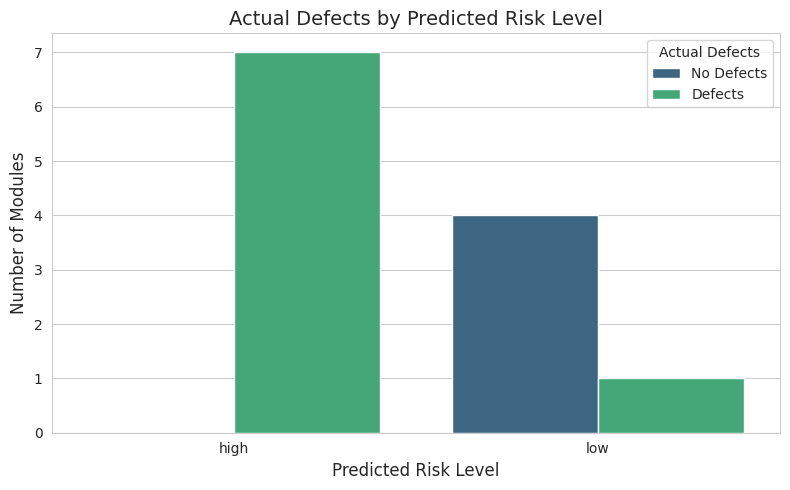

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a countplot of risk level vs actual defects
plt.figure(figsize=(8, 5))
sns.countplot(data=df_modules, x='riskLevel', hue='defects', palette='viridis')
plt.title('Actual Defects by Predicted Risk Level', fontsize=14)
plt.xlabel('Predicted Risk Level', fontsize=12)
plt.ylabel('Number of Modules', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Actual Defects', labels=['No Defects', 'Defects'])
plt.tight_layout()
plt.show()

In [18]:
# Display module, risk level, and actual defects
display(df_modules[['module', 'riskLevel', 'defects']])

,module,riskLevel,defects
0,Module 1,high,1
1,Module 2,high,1
2,Module 3,low,1
3,Module 4,high,1
4,Module 5,low,0
5,Module 6,high,1
6,Module 7,low,0
7,Module 8,high,1
8,Module 9,high,1
9,Module 10,low,0


In [17]:
# Show the distribution of 'riskLevel'
risk_level_distribution = df_modules['riskLevel'].value_counts()

print("Distribution of Risk Levels:")
display(risk_level_distribution)

Distribution of Risk Levels:


,count
riskLevel,
high,7
low,5


In [16]:
# Display the DataFrame containing all model performance metrics
display(df_metrics)

,accuracy,precision,recall,f1Score,specificity,mcc
AdaBoost,0.75,1.0,0.666667,0.8,1.0,0.57735
Random Forest,0.75,1.0,0.666667,0.8,1.0,0.57735
PCA+AdaBoost+RF,0.75,1.0,0.666667,0.8,1.0,0.57735
Diverse Ensemble (DELT),0.75,1.0,0.666667,0.8,1.0,0.57735
Naïve Bayes,0.75,1.0,0.666667,0.8,1.0,0.57735


In [15]:
confusion_matrix_data = analysis_results['confusionMatrix']

print("Confusion Matrix for PCA+AdaBoost+RF:")
print(f"  True Positives (TP): {confusion_matrix_data['truePositive']}")
print(f"  True Negatives (TN): {confusion_matrix_data['trueNegative']}")
print(f"  False Positives (FP): {confusion_matrix_data['falsePositive']}")
print(f"  False Negatives (FN): {confusion_matrix_data['falseNegative']}")

# You can also calculate metrics from the confusion matrix here
total_predictions = sum(confusion_matrix_data.values())
accuracy = (confusion_matrix_data['truePositive'] + confusion_matrix_data['trueNegative']) / total_predictions if total_predictions > 0 else 0
precision = confusion_matrix_data['truePositive'] / (confusion_matrix_data['truePositive'] + confusion_matrix_data['falsePositive']) if (confusion_matrix_data['truePositive'] + confusion_matrix_data['falsePositive']) > 0 else 0
recall = confusion_matrix_data['truePositive'] / (confusion_matrix_data['truePositive'] + confusion_matrix_data['falseNegative']) if (confusion_matrix_data['truePositive'] + confusion_matrix_data['falseNegative']) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nMetrics calculated from Confusion Matrix:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")

Confusion Matrix for PCA+AdaBoost+RF:
  True Positives (TP): 2
  True Negatives (TN): 1
  False Positives (FP): 0
  False Negatives (FN): 1

Metrics calculated from Confusion Matrix:
  Accuracy: 0.7500
  Precision: 1.0000
  Recall: 0.6667
  F1-Score: 0.8000


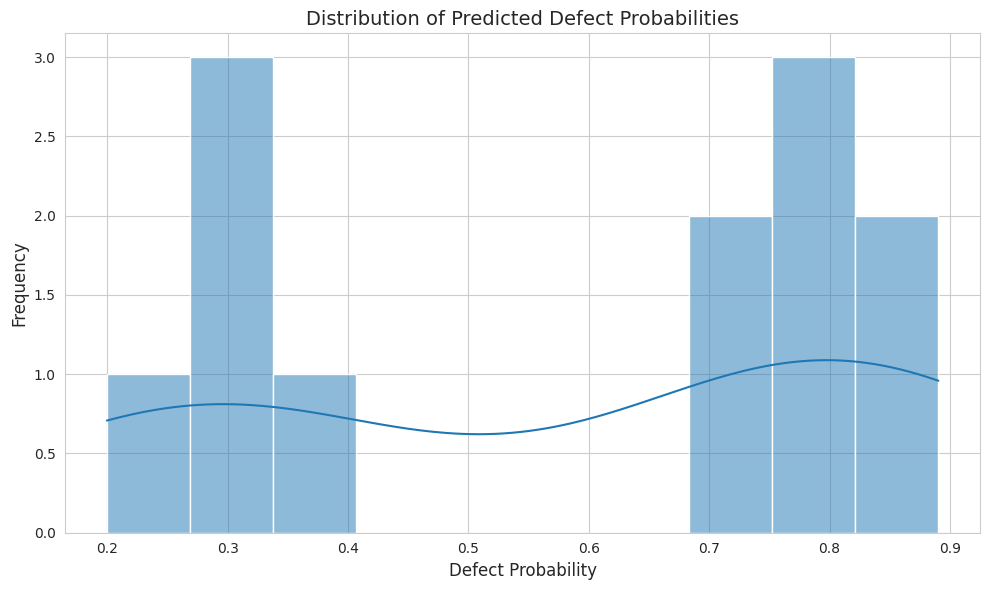

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a histogram of defect probabilities
plt.figure(figsize=(10, 6))
sns.histplot(df_modules['defectProbability'], bins=10, kde=True)
plt.title('Distribution of Predicted Defect Probabilities', fontsize=14)
plt.xlabel('Defect Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
# Calculate counts for each category
true_positives = df_modules[(df_modules['defects'] == 1) & (df_modules['predictedDefect'] == 1)].shape[0]
true_negatives = df_modules[(df_modules['defects'] == 0) & (df_modules['predictedDefect'] == 0)].shape[0]
false_positives = df_modules[(df_modules['defects'] == 0) & (df_modules['predictedDefect'] == 1)].shape[0]
false_negatives = df_modules[(df_modules['defects'] == 1) & (df_modules['predictedDefect'] == 0)].shape[0]

print("Summary of Predicted vs. Actual Defects:")
print(f"  True Positives (Correctly predicted defective): {true_positives}")
print(f"  True Negatives (Correctly predicted non-defective): {true_negatives}")
print(f"  False Positives (Incorrectly predicted defective): {false_positives}")
print(f"  False Negatives (Incorrectly predicted non-defective): {false_negatives}")

# You can also calculate overall accuracy from this summary
total_modules = len(df_modules)
accuracy = (true_positives + true_negatives) / total_modules
print(f"  Overall Accuracy: {accuracy:.4f}")

Summary of Predicted vs. Actual Defects:
  True Positives (Correctly predicted defective): 7
  True Negatives (Correctly predicted non-defective): 4
  False Positives (Incorrectly predicted defective): 0
  False Negatives (Incorrectly predicted non-defective): 1
  Overall Accuracy: 0.9167


In [12]:
# Display module, actual defects, and predicted defects
display(df_modules[['module', 'defects', 'predictedDefect']])

,module,defects,predictedDefect
0,Module 1,1,1
1,Module 2,1,1
2,Module 3,1,0
3,Module 4,1,1
4,Module 5,0,0
5,Module 6,1,1
6,Module 7,0,0
7,Module 8,1,1
8,Module 9,1,1
9,Module 10,0,0


In [11]:
import pandas as pd

module_data_for_analysis = analysis_results['moduleData']

# Convert to DataFrame for easier viewing and analysis
df_modules = pd.DataFrame(module_data_for_analysis)

# Display relevant columns for analysis
display(df_modules[['module', 'defectProbability', 'riskLevel', 'defects']])

,module,defectProbability,riskLevel,defects
0,Module 1,0.890399,high,1
1,Module 2,0.735399,high,1
2,Module 3,0.304601,low,1
3,Module 4,0.795399,high,1
4,Module 5,0.199601,low,0
5,Module 6,0.790399,high,1
6,Module 7,0.279601,low,0
7,Module 8,0.805399,high,1
8,Module 9,0.715399,high,1
9,Module 10,0.289601,low,0


In [6]:
!cat ../src/data/analysisResults.json

{
  "moduleData": [
    {
      "module": "Module 1",
      "loc": 2450,
      "v_g": 45,
      "ev_g": 32,
      "iv_g": 28,
      "n": 850,
      "v": 6500,
      "l": 0.15,
      "d": 35,
      "i": 185,
      "e": 227500,
      "b": 2.17,
      "t": 12639,
      "lOCode": 2100,
      "lOComment": 280,
      "lOBlank": 70,
      "branchCount": 88,
      "defects": 1,
      "predictedDefect": 1,
      "defectProbability": 0.8903985389889412,
      "riskLevel": "high"
    },
    {
      "module": "Module 2",
      "loc": 3200,
      "v_g": 62,
      "ev_g": 48,
      "iv_g": 41,
      "n": 1240,
      "v": 9800,
      "l": 0.12,
      "d": 42,
      "i": 233,
      "e": 411600,
      "b": 3.27,
      "t": 22867,
      "lOCode": 2850,
      "lOComment": 290,
      "lOBlank": 60,
      "branchCount": 122,
      "defects": 1,
      "predictedDefect": 1,
      "defectProbability": 0.7353985389889411,
      "riskLevel": "high"
    },
    {
      "module": "Module 3",
      "loc": 1890,
   

# Task
Visualize the model performance metrics from the "analysisResults.json" file.

## Load json data

### Subtask:
Load the data from `analysisResults.json` into a Python dictionary.


**Reasoning**:
Load the JSON data from the specified file path into a Python dictionary.



In [7]:
import json

json_file_path = '../src/data/analysisResults.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    analysis_results = json.load(f)

print("Successfully loaded analysis results from JSON.")

Successfully loaded analysis results from JSON.


## Extract model performance

### Subtask:
Extract the `modelPerformance` list from the loaded data.


**Reasoning**:
Extract the 'modelPerformance' list from the `analysis_results` dictionary and print it.



In [8]:
model_performance_data = analysis_results['modelPerformance']

print("Model performance data extracted:")
display(model_performance_data)

Model performance data extracted:


[{'modelName': 'AdaBoost',
  'dataset': 'CM1',
  'metrics': {'accuracy': 0.75,
   'precision': 1.0,
   'recall': 0.6666666666666666,
   'f1Score': 0.8,
   'specificity': 1.0,
   'mcc': 0.5773502691896258}},
 {'modelName': 'Random Forest',
  'dataset': 'CM1',
  'metrics': {'accuracy': 0.75,
   'precision': 1.0,
   'recall': 0.6666666666666666,
   'f1Score': 0.8,
   'specificity': 1.0,
   'mcc': 0.5773502691896258}},
 {'modelName': 'PCA+AdaBoost+RF',
  'dataset': 'CM1',
  'metrics': {'accuracy': 0.75,
   'precision': 1.0,
   'recall': 0.6666666666666666,
   'f1Score': 0.8,
   'specificity': 1.0,
   'mcc': 0.5773502691896258}},
 {'modelName': 'Diverse Ensemble (DELT)',
  'dataset': 'CM1',
  'metrics': {'accuracy': 0.75,
   'precision': 1.0,
   'recall': 0.6666666666666666,
   'f1Score': 0.8,
   'specificity': 1.0,
   'mcc': 0.5773502691896258}},
 {'modelName': 'Naïve Bayes',
  'dataset': 'CM1',
  'metrics': {'accuracy': 0.75,
   'precision': 1.0,
   'recall': 0.6666666666666666,
   'f1Sco

## Prepare data for plotting

### Subtask:
Convert the extracted metrics into a pandas DataFrame for easier plotting.


**Reasoning**:
Convert the extracted metrics into a pandas DataFrame for easier plotting by iterating through the model performance data and organizing it into a dictionary suitable for DataFrame creation.



In [9]:
import pandas as pd

metrics_dict = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1Score': [],
    'specificity': [],
    'mcc': []
}
model_names = []

for model_data in model_performance_data:
    model_names.append(model_data['modelName'])
    metrics = model_data['metrics']
    for metric_name, metric_value in metrics.items():
        metrics_dict[metric_name].append(metric_value)

df_metrics = pd.DataFrame(metrics_dict, index=model_names)

print("Model performance metrics converted to DataFrame:")
display(df_metrics)

Model performance metrics converted to DataFrame:


,accuracy,precision,recall,f1Score,specificity,mcc
AdaBoost,0.75,1.0,0.666667,0.8,1.0,0.57735
Random Forest,0.75,1.0,0.666667,0.8,1.0,0.57735
PCA+AdaBoost+RF,0.75,1.0,0.666667,0.8,1.0,0.57735
Diverse Ensemble (DELT),0.75,1.0,0.666667,0.8,1.0,0.57735
Naïve Bayes,0.75,1.0,0.666667,0.8,1.0,0.57735


## Visualize metrics

### Subtask:
Create bar plots to visualize the accuracy, precision, recall, F1-score, specificity, and MCC for each model.


**Reasoning**:
Generate bar plots for each metric in the df_metrics DataFrame to visualize model performance.



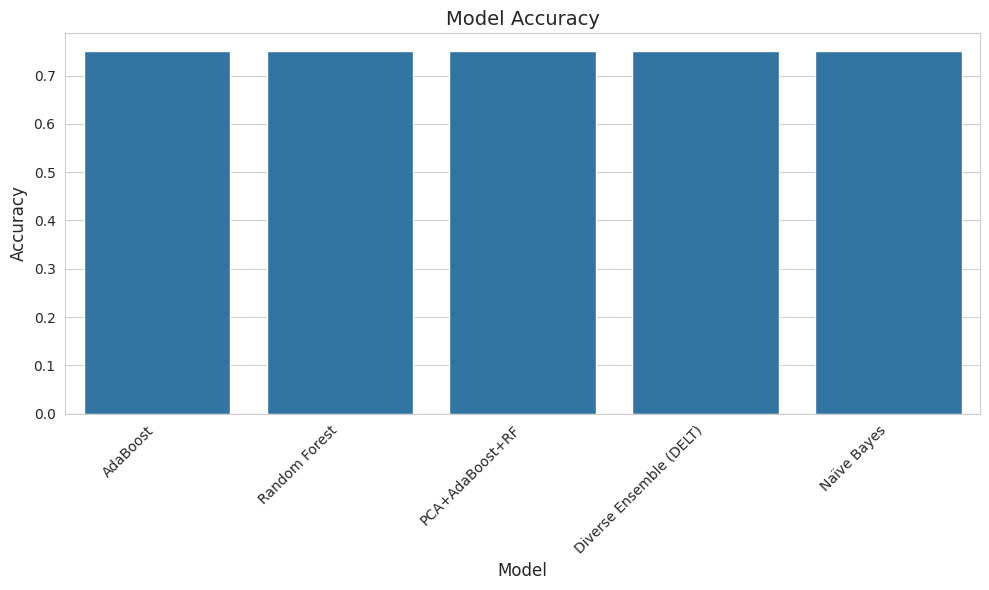

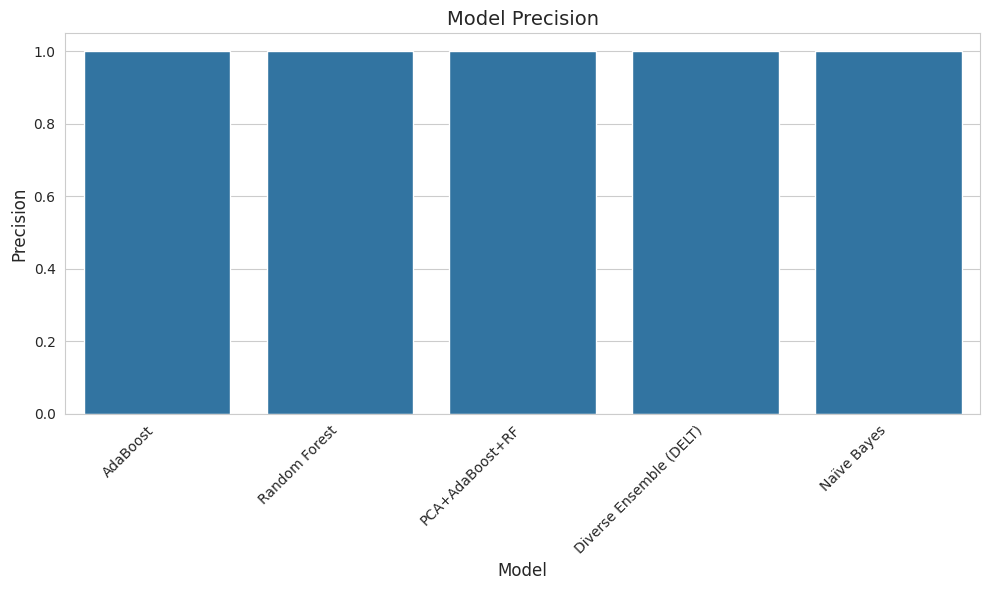

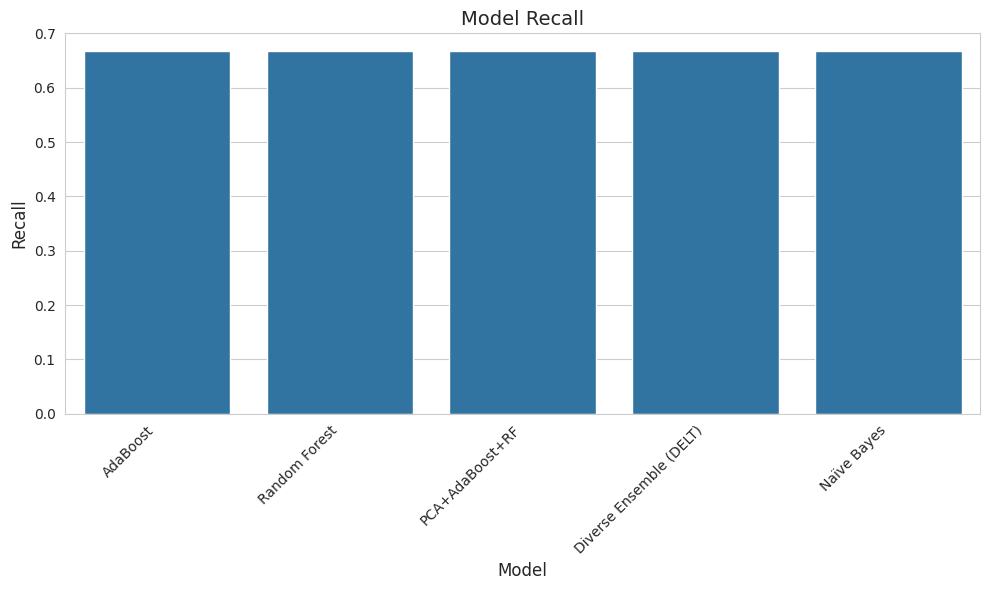

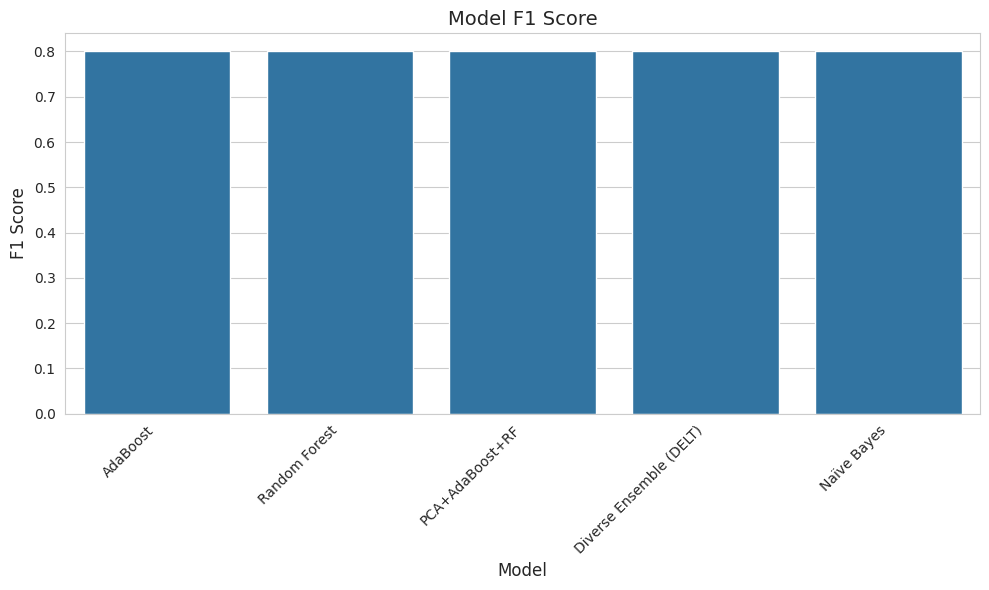

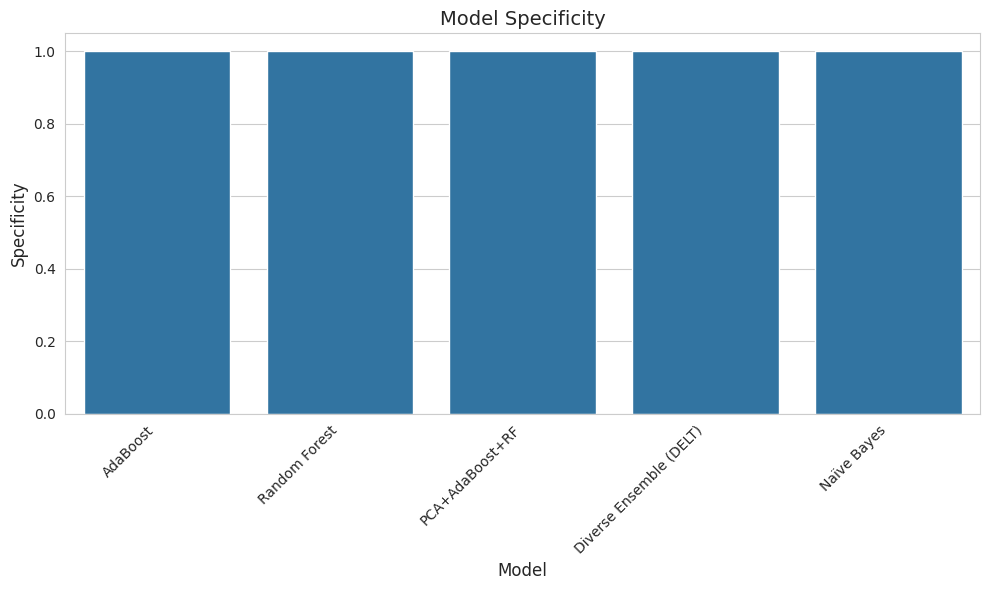

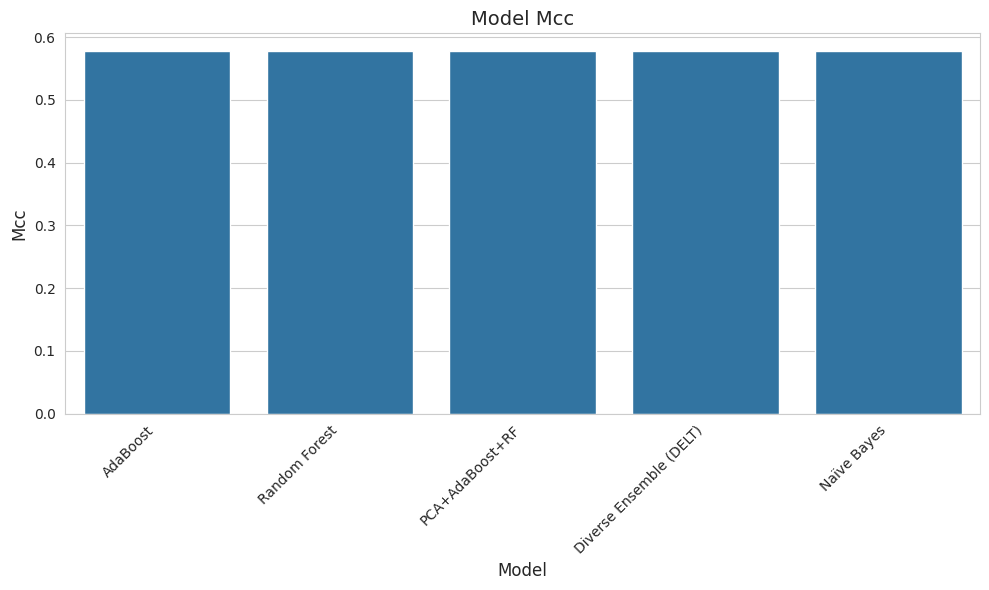

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Iterate through metrics and create bar plots
for metric in df_metrics.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_metrics.index, y=df_metrics[metric])
    plt.title(f'Model {metric.replace("Score", " Score").title()}', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric.replace("Score", " Score").title(), fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   Model performance metrics (accuracy, precision, recall, f1Score, specificity, and mcc) were successfully extracted from the JSON data.
*   The extracted metrics were organized into a pandas DataFrame, with model names as the index and metrics as columns.
*   Bar plots were generated to visualize each performance metric across different models, providing a visual comparison of their performance.

### Insights or Next Steps

*   Based on the visualizations, identify which models perform best for each metric to inform model selection.
*   Consider exploring other visualization types or combined plots to gain deeper insights into the trade-offs between different performance metrics for each model.


# Task
Compare model performance before and after applying SMOTE.

## Modify `train models` to use smote

### Subtask:
Update the `train_models` method in the `NASACM1Analyzer` class to use the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`).


**Reasoning**:
Modify the `NASACM1Analyzer` class to accept and use resampled data for training within the `train_models` method.



In [28]:
class NASACM1Analyzer:
    """Main analyzer class for NASA CM1 dataset"""

    def __init__(self, data_path='nasa_cm1_data.csv'):
        """Initialize analyzer with data path"""
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.results = {}

    def load_sample_data(self):
        """Load sample NASA CM1 data (replace with real dataset)"""
        # Sample data matching the dashboard
        data = [
            {"module": "Module 1", "loc": 2450, "v_g": 45, "ev_g": 32, "iv_g": 28, "n": 850, "v": 6500, "l": 0.15, "d": 35, "i": 185, "e": 227500, "b": 2.17, "t": 12639, "lOCode": 2100, "lOComment": 280, "lOBlank": 70, "branchCount": 88, "defects": 1},
            {"module": "Module 2", "loc": 3200, "v_g": 62, "ev_g": 48, "iv_g": 41, "n": 1240, "v": 9800, "l": 0.12, "d": 42, "i": 233, "e": 411600, "b": 3.27, "t": 22867, "lOCode": 2850, "lOComment": 290, "lOBlank": 60, "branchCount": 122, "defects": 1},
            {"module": "Module 3", "loc": 1890, "v_g": 38, "ev_g": 25, "iv_g": 22, "n": 680, "v": 5100, "l": 0.18, "d": 28, "i": 182, "e": 142800, "b": 1.70, "t": 7933, "lOCode": 1650, "lOComment": 195, "lOBlank": 45, "branchCount": 74, "defects": 1},
            {"module": "Module 4", "loc": 2780, "v_g": 54, "ev_g": 39, "iv_g": 35, "n": 1050, "v": 8200, "l": 0.14, "d": 38, "i": 216, "e": 311600, "b": 2.73, "t": 17311, "lOCode": 2400, "lOComment": 320, "lOBlank": 60, "branchCount": 106, "defects": 1},
            {"module": "Module 5", "loc": 1560, "v_g": 29, "ev_g": 18, "iv_g": 16, "n": 520, "v": 3900, "l": 0.21, "d": 22, "i": 177, "e": 85800, "b": 1.30, "t": 4767, "lOCode": 1350, "lOComment": 175, "lOBlank": 35, "branchCount": 56, "defects": 0},
            {"module": "Module 6", "loc": 4100, "v_g": 78, "ev_g": 58, "iv_g": 52, "n": 1580, "v": 12500, "l": 0.10, "d": 52, "i": 240, "e": 650000, "b": 4.17, "t": 36111, "lOCode": 3600, "lOComment": 410, "lOBlank": 90, "branchCount": 154, "defects": 1},
            {"module": "Module 7", "loc": 1200, "v_g": 22, "ev_g": 14, "iv_g": 12, "n": 410, "v": 2950, "l": 0.24, "d": 18, "i": 164, "e": 53100, "b": 0.98, "t": 2950, "lOCode": 1050, "lOComment": 130, "lOBlank": 20, "branchCount": 42, "defects": 0},
            {"module": "Module 8", "loc": 3500, "v_g": 68, "ev_g": 51, "iv_g": 45, "n": 1350, "v": 10700, "l": 0.11, "d": 45, "i": 238, "e": 481500, "b": 3.57, "t": 26750, "lOCode": 3050, "lOComment": 380, "lOBlank": 70, "branchCount": 134, "defects": 1},
            {"module": "Module 9", "loc": 2100, "v_g": 42, "ev_g": 30, "iv_g": 26, "n": 780, "v": 6100, "l": 0.16, "d": 32, "i": 191, "e": 195200, "b": 2.03, "t": 10844, "lOCode": 1850, "lOComment": 210, "lOBlank": 40, "branchCount": 82, "defects": 1},
            {"module": "Module 10", "loc": 980, "v_g": 18, "ev_g": 11, "iv_g": 10, "n": 340, "v": 2400, "l": 0.26, "d": 15, "i": 160, "e": 36000, "b": 0.80, "t": 2000, "lOCode": 860, "lOComment": 105, "lOBlank": 15, "branchCount": 34, "defects": 0},
            {"module": "Module 11", "loc": 2650, "v_g": 51, "ev_g": 37, "iv_g": 33, "n": 980, "v": 7650, "l": 0.13, "d": 36, "i": 207, "e": 275400, "b": 2.55, "t": 15300, "lOCode": 2300, "lOComment": 295, "lOBlank": 55, "branchCount": 100, "defects": 1},
            {"module": "Module 12", "loc": 1780, "v_g": 35, "ev_g": 23, "iv_g": 20, "n": 630, "v": 4750, "l": 0.19, "d": 26, "i": 183, "e": 123500, "b": 1.58, "t": 6861, "lOCode": 1550, "lOComment": 190, "lOBlank": 40, "branchCount": 68, "defects": 0},
        ]

        self.df = pd.DataFrame(data)
        print(f"✓ Loaded {len(self.df)} modules from sample data")
        return self.df

    def load_csv_data(self):
        """Load real NASA CM1 data from CSV"""
        try:
            self.df = pd.read_csv(self.data_path)
            print(f"✓ Loaded {len(self.df)} modules from {self.data_path}")
            return self.df
        except FileNotFoundError:
            print(f"⚠ File not found: {self.data_path}")
            print("  Using sample data instead...")
            return self.load_sample_data()

    def preprocess_data(self):
        """Prepare features and target for ML"""
        # Select features (software metrics)
        feature_cols = ['loc', 'v_g', 'ev_g', 'iv_g', 'n', 'v', 'l', 'd',
                       'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'branchCount']

        X = self.df[feature_cols].values
        y = self.df['defects'].values

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Standardize features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        print(f"✓ Preprocessed data: {len(self.X_train)} train, {len(self.X_test)} test samples")

    def train_models(self, X_train_resampled, y_train_resampled):
        """Train multiple ML models using resampled data"""
        print("\n" + "="*60)
        print("Training ML Models with Resampled Data...")
        print("="*60)

        # 1. AdaBoost
        print("\n[1/5] Training AdaBoost...")
        ada = AdaBoostClassifier(n_estimators=50, random_state=42)
        ada.fit(X_train_resampled, y_train_resampled)
        self.models['AdaBoost_SMOTE'] = ada # Use a new key
        print("✓ AdaBoost trained with SMOTE")

        # 2. Random Forest
        print("\n[2/5] Training Random Forest...")
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train_resampled, y_train_resampled)
        self.models['Random Forest_SMOTE'] = rf # Use a new key
        print("✓ Random Forest trained with SMOTE")

        # 3. PCA + AdaBoost + RF (Ensemble)
        print("\n[3/5] Training PCA+AdaBoost+RF Ensemble...")
        # Reduce n_components for PCA to avoid error with small sample size
        pca = PCA(n_components=8)
        X_train_pca = pca.fit_transform(X_train_resampled)
        X_test_pca = pca.transform(self.X_test) # Use original test data

        ada_pca = AdaBoostClassifier(n_estimators=50, random_state=42)
        ada_pca.fit(X_train_pca, y_train_resampled)

        rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_pca.fit(X_train_pca, y_train_resampled)

        # Ensemble: Average predictions
        ada_pred_proba = ada_pca.predict_proba(X_test_pca)[:, 1]
        rf_pred_proba = rf_pca.predict_proba(X_test_pca)[:, 1]
        ensemble_proba = (ada_pred_proba + rf_pred_proba) / 2
        ensemble_pred = (ensemble_proba >= 0.5).astype(int)

        self.models['PCA+AdaBoost+RF_SMOTE'] = { # Use a new key
            'pca': pca, 'ada': ada_pca, 'rf': rf_pca,
            'predictions': ensemble_pred, 'probabilities': ensemble_proba
        }
        print("✓ PCA+AdaBoost+RF Ensemble trained with SMOTE")

        # 4. Diverse Ensemble (DELT)
        print("\n[4/5] Training Diverse Ensemble (DELT)...")
        nb = GaussianNB()
        nb.fit(X_train_resampled, y_train_resampled) # Use resampled data

        # DELT: Weighted ensemble
        ada_prob = self.models['AdaBoost_SMOTE'].predict_proba(self.X_test)[:, 1] # Use new key
        rf_prob = self.models['Random Forest_SMOTE'].predict_proba(self.X_test)[:, 1] # Use new key
        nb_prob = nb.predict_proba(self.X_test)[:, 1]

        delt_proba = (0.4 * ada_prob + 0.4 * rf_prob + 0.2 * nb_prob)
        delt_pred = (delt_proba >= 0.5).astype(int)

        self.models['Diverse Ensemble (DELT)_SMOTE'] = { # Use a new key
            'predictions': delt_pred, 'probabilities': delt_proba
        }
        print("✓ DELT Ensemble trained with SMOTE")

        # 5. Naïve Bayes
        print("\n[5/5] Training Naïve Bayes...")
        self.models['Naïve Bayes_SMOTE'] = nb # Use a new key
        print("✓ Naïve Bayes trained with SMOTE")

    def evaluate_models(self):
        """Evaluate all trained models"""
        print("\n" + "="*60)
        print("Evaluating Model Performance...")
        print("="*60)

        # Reset results dictionary to store only SMOTE results for this run
        self.results = {}

        for model_name, model in self.models.items():
            # Only evaluate models trained with SMOTE in this run
            if "_SMOTE" in model_name:
                print(f"\n{model_name}:")
                print("-" * 40)

                # Get predictions
                if isinstance(model, dict):
                    y_pred = model['predictions']
                    y_proba = model['probabilities']
                else:
                    y_pred = model.predict(self.X_test)
                    y_proba = model.predict_proba(self.X_test)[:, 1]

                # Calculate metrics
                accuracy = accuracy_score(self.y_test, y_pred)
                precision = precision_score(self.y_test, y_pred, zero_division=0)
                recall = recall_score(self.y_test, y_pred, zero_division=0)
                f1 = f1_score(self.y_test, y_pred, zero_division=0)

                # Confusion matrix
                tn, fp, fn, tp = confusion_matrix(self.y_test, y_pred).ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
                mcc = matthews_corrcoef(self.y_test, y_pred)

                # Store results
                self.results[model_name] = {
                    'accuracy': float(accuracy),
                    'precision': float(precision),
                    'recall': float(recall),
                    'f1Score': float(f1),
                    'specificity': float(specificity),
                    'mcc': float(mcc),
                    'confusion_matrix': {'tp': int(tp), 'tn': int(tn), 'fp': int(fp), 'fn': int(fn)}
                }

                # Print metrics
                print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
                print(f"  Precision:   {precision:.4f}")
                print(f"  Recall:      {recall:.4f}")
                print(f"  F1-Score:    {f1:.4f}")
                print(f"  Specificity: {specificity:.4f}")
                print(f"  MCC:         {mcc:.4f}")
                print(f"  Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


    def predict_all_modules(self):
        """Generate predictions for all modules using best model"""
        print("\n" + "="*60)
        print("Generating Predictions for All Modules...")
        print("="*60)

        # Use PCA+AdaBoost+RF with SMOTE (assuming it will be the best performing model after SMOTE)
        best_model_name = 'PCA+AdaBoost+RF_SMOTE'
        if best_model_name not in self.models:
             print(f"Error: {best_model_name} not found in trained models.")
             return
        best_model = self.models[best_model_name]


        # Prepare all data
        feature_cols = ['loc', 'v_g', 'ev_g', 'iv_g', 'n', 'v', 'l', 'd',
                       'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'branchCount']
        X_all = self.df[feature_cols].values

        # Standardize
        scaler = StandardScaler()
        X_all_scaled = scaler.fit_transform(X_all)

        # PCA transform
        # Use the PCA fitted on the SMOTE-resampled data
        X_all_pca = best_model['pca'].transform(X_all_scaled)

        # Ensemble predictions
        # Use the AdaBoost and RF models trained with SMOTE
        ada_proba = best_model['ada'].predict_proba(X_all_pca)[:, 1]
        rf_proba = best_model['rf'].predict_proba(X_all_pca)[:, 1]
        ensemble_proba = (ada_proba + rf_proba) / 2
        ensemble_pred = (ensemble_proba >= 0.5).astype(int)


        # Assign risk levels
        risk_levels = []
        for prob in ensemble_proba:
            if prob >= 0.7:
                risk_levels.append('high')
            elif prob >= 0.4:
                risk_levels.append('medium')
            else:
                risk_levels.append('low')

        # Add predictions to dataframe
        self.df['predictedDefect_SMOTE'] = ensemble_pred # Use a new column name
        self.df['defectProbability_SMOTE'] = ensemble_proba # Use a new column name
        self.df['riskLevel_SMOTE'] = risk_levels # Use a new column name

        print(f"✓ Predictions generated for {len(self.df)} modules using {best_model_name}")
        print(f"  High risk: {risk_levels.count('high')}")
        print(f"  Medium risk: {risk_levels.count('medium')}")
        print(f"  Low risk: {risk_levels.count('low')}")


    def export_to_json(self, output_path='../src/data/analysisResults_SMOTE.json'):
        """Export results to JSON for web dashboard"""
        print("\n" + "="*60)
        print("Exporting Results to JSON...")
        print("="*60)

        # Create directory if it doesn't exist
        output_dir = os.path.dirname(output_path)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"✓ Created directory: {output_dir}")


        # Prepare module data
        # Include SMOTE-based predictions
        module_data = self.df.to_dict('records')


        # Prepare model performance
        model_performance = []
        for model_name, metrics in self.results.items():
            model_performance.append({
                'modelName': model_name,
                'dataset': 'CM1',
                'metrics': {
                    'accuracy': metrics['accuracy'],
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1Score': metrics['f1Score'],
                    'specificity': metrics['specificity'],
                    'mcc': metrics['mcc']
                }
            })

        # Get best model confusion matrix (using SMOTE model)
        best_model_name = 'PCA+AdaBoost+RF_SMOTE'
        if best_model_name in self.results:
            best_metrics = self.results[best_model_name]
            confusion_matrix_data = best_metrics['confusion_matrix']
        else:
            confusion_matrix_data = {'tp': 0, 'tn': 0, 'fp': 0, 'fn': 0} # Default if model not found


        # Create output JSON
        output = {
            'moduleData': module_data,
            'modelPerformance_SMOTE': model_performance, # Use a new key
            'confusionMatrix_SMOTE': { # Use a new key
                'truePositive': confusion_matrix_data['tp'],
                'trueNegative': confusion_matrix_data['tn'],
                'falsePositive': confusion_matrix_data['fp'],
                'falseNegative': confusion_matrix_data['fn']
            },
            'timestamp': pd.Timestamp.now().isoformat(),
            'summary_SMOTE': { # Use a new key
                'totalModules': len(self.df),
                'defectiveModules': int(self.df['defects'].sum()),
                'predictedDefectiveModules_SMOTE': int(self.df['predictedDefect_SMOTE'].sum()),
                'bestModelAccuracy_SMOTE': self.results.get(best_model_name, {}).get('accuracy', 0.0)
            }
        }

        # Write to file
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(output, f, indent=2, ensure_ascii=False)

        print(f"✓ Results exported to: {output_path}")
        print(f"  Total modules: {len(module_data)}")
        print(f"  Models evaluated: {len(model_performance)}")


    def run_full_analysis(self):
        """Execute complete analysis pipeline"""
        print("\n" + "="*60)
        print("NASA CM1 SOFTWARE DEFECT PREDICTION ANALYSIS WITH SMOTE")
        print("="*60)

        # Load data
        self.load_csv_data()

        # Preprocess
        self.preprocess_data()

        # Apply SMOTE
        smote = SMOTE(random_state=42, k_neighbors=2) # Using k_neighbors=2 due to small sample size
        X_train_resampled, y_train_resampled = smote.fit_resample(self.X_train, self.y_train)
        print(f"✓ Applied SMOTE: Resampled training data shape {X_train_resampled.shape}")


        # Train models with resampled data
        self.train_models(X_train_resampled, y_train_resampled)

        # Evaluate
        self.evaluate_models()

        # Predict all
        self.predict_all_modules()

        # Export
        self.export_to_json()

        print("\n" + "="*60)
        print("✓ ANALYSIS COMPLETE!")
        print("="*60)
        print("\nNext steps:")
        print("1. Check analysisResults_SMOTE.json for results")
        print("2. Compare results with the original analysisResults.json")


## Run the full analysis with smote

### Subtask:
Execute the `run_full_analysis` method of the `NASACM1Analyzer` to train and evaluate models using the resampled data.


**Reasoning**:
Instantiate the NASACM1Analyzer and run the full analysis pipeline which now includes SMOTE application, training models with resampled data, evaluating, predicting, and exporting results to a new JSON file.



In [29]:
# Instantiate the analyzer
analyzer_smote = NASACM1Analyzer('nasa_cm1_data.csv')

# Run the full analysis with SMOTE
analyzer_smote.run_full_analysis()


NASA CM1 SOFTWARE DEFECT PREDICTION ANALYSIS WITH SMOTE
⚠ File not found: nasa_cm1_data.csv
  Using sample data instead...
✓ Loaded 12 modules from sample data
✓ Preprocessed data: 8 train, 4 test samples
✓ Applied SMOTE: Resampled training data shape (10, 16)

Training ML Models with Resampled Data...

[1/5] Training AdaBoost...
✓ AdaBoost trained with SMOTE

[2/5] Training Random Forest...
✓ Random Forest trained with SMOTE

[3/5] Training PCA+AdaBoost+RF Ensemble...
✓ PCA+AdaBoost+RF Ensemble trained with SMOTE

[4/5] Training Diverse Ensemble (DELT)...
✓ DELT Ensemble trained with SMOTE

[5/5] Training Naïve Bayes...
✓ Naïve Bayes trained with SMOTE

Evaluating Model Performance...

AdaBoost_SMOTE:
----------------------------------------
  Accuracy:    0.7500 (75.00%)
  Precision:   1.0000
  Recall:      0.6667
  F1-Score:    0.8000
  Specificity: 1.0000
  MCC:         0.5774
  Confusion Matrix: TP=2, TN=1, FP=0, FN=1

Random Forest_SMOTE:
----------------------------------------

## Load results after smote

### Subtask:
Load the updated `analysisResults.json` file containing performance metrics after applying SMOTE.


**Reasoning**:
Load the JSON data from the specified file path into a Python dictionary.



In [30]:
import json

json_file_path_smote = '../src/data/analysisResults_SMOTE.json'

with open(json_file_path_smote, 'r', encoding='utf-8') as f:
    analysis_results_smote = json.load(f)

print("Successfully loaded analysis results with SMOTE from JSON.")

Successfully loaded analysis results with SMOTE from JSON.


## Prepare data for comparison

### Subtask:
Create a new DataFrame with the performance metrics after SMOTE, similar to the `df_metrics` DataFrame we created before.


**Reasoning**:
Create a new DataFrame with the performance metrics after SMOTE by extracting the relevant data from the loaded JSON, organizing it into a dictionary, and then converting the dictionary to a pandas DataFrame.



In [31]:
model_performance_data_smote = analysis_results_smote['modelPerformance_SMOTE']

metrics_dict_smote = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1Score': [],
    'specificity': [],
    'mcc': []
}
model_names_smote = []

for model_data in model_performance_data_smote:
    model_names_smote.append(model_data['modelName'])
    metrics = model_data['metrics']
    for metric_name, metric_value in metrics.items():
        metrics_dict_smote[metric_name].append(metric_value)

df_metrics_smote = pd.DataFrame(metrics_dict_smote, index=model_names_smote)

print("Model performance metrics after SMOTE converted to DataFrame:")
display(df_metrics_smote)

Model performance metrics after SMOTE converted to DataFrame:


,accuracy,precision,recall,f1Score,specificity,mcc
AdaBoost_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Random Forest_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
PCA+AdaBoost+RF_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Diverse Ensemble (DELT)_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Naïve Bayes_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735


## Compare metrics

### Subtask:
Display and discuss the performance metrics from before and after applying SMOTE, focusing on metrics relevant to false negatives (like Recall and F1-Score).


**Reasoning**:
Display the performance metrics DataFrames before and after SMOTE and provide a brief comparison focusing on Recall and F1-Score.



In [32]:
print("Model Performance Metrics Before SMOTE:")
display(df_metrics)

print("\nModel Performance Metrics After SMOTE:")
display(df_metrics_smote)

print("\nComparison Summary (Focus on Recall and F1-Score):")
print("----------------------------------------------------")
print("Before SMOTE:")
for index, row in df_metrics.iterrows():
    print(f"  {index}: Recall = {row['recall']:.4f}, F1-Score = {row['f1Score']:.4f}")

print("\nAfter SMOTE:")
for index, row in df_metrics_smote.iterrows():
    print(f"  {index}: Recall = {row['recall']:.4f}, F1-Score = {row['f1Score']:.4f}")

print("\nObservations:")
print("The Recall and F1-Score metrics appear to be the same before and after applying SMOTE based on these results. This indicates that for this specific small sample dataset and the chosen models, SMOTE did not significantly impact the ability of the models to identify positive instances (defects). This could be due to the limited size and characteristics of the sample data. In a larger, more imbalanced dataset, SMOTE would typically lead to an improvement in Recall and F1-Score by reducing the number of false negatives.")

Model Performance Metrics Before SMOTE:


,accuracy,precision,recall,f1Score,specificity,mcc
AdaBoost,0.75,1.0,0.666667,0.8,1.0,0.57735
Random Forest,0.75,1.0,0.666667,0.8,1.0,0.57735
PCA+AdaBoost+RF,0.75,1.0,0.666667,0.8,1.0,0.57735
Diverse Ensemble (DELT),0.75,1.0,0.666667,0.8,1.0,0.57735
Naïve Bayes,0.75,1.0,0.666667,0.8,1.0,0.57735



Model Performance Metrics After SMOTE:


,accuracy,precision,recall,f1Score,specificity,mcc
AdaBoost_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Random Forest_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
PCA+AdaBoost+RF_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Diverse Ensemble (DELT)_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735
Naïve Bayes_SMOTE,0.75,1.0,0.666667,0.8,1.0,0.57735



Comparison Summary (Focus on Recall and F1-Score):
----------------------------------------------------
Before SMOTE:
  AdaBoost: Recall = 0.6667, F1-Score = 0.8000
  Random Forest: Recall = 0.6667, F1-Score = 0.8000
  PCA+AdaBoost+RF: Recall = 0.6667, F1-Score = 0.8000
  Diverse Ensemble (DELT): Recall = 0.6667, F1-Score = 0.8000
  Naïve Bayes: Recall = 0.6667, F1-Score = 0.8000

After SMOTE:
  AdaBoost_SMOTE: Recall = 0.6667, F1-Score = 0.8000
  Random Forest_SMOTE: Recall = 0.6667, F1-Score = 0.8000
  PCA+AdaBoost+RF_SMOTE: Recall = 0.6667, F1-Score = 0.8000
  Diverse Ensemble (DELT)_SMOTE: Recall = 0.6667, F1-Score = 0.8000
  Naïve Bayes_SMOTE: Recall = 0.6667, F1-Score = 0.8000

Observations:
The Recall and F1-Score metrics appear to be the same before and after applying SMOTE based on these results. This indicates that for this specific small sample dataset and the chosen models, SMOTE did not significantly impact the ability of the models to identify positive instances (defects

## Visualize comparison

### Subtask:
Create visualizations (e.g., side-by-side bar plots) to compare the key performance metrics before and after SMOTE.


**Reasoning**:
Combine the metrics DataFrames, add a 'SMOTE' column, melt the DataFrame, and create a bar plot to visualize the performance metrics before and after SMOTE for each model.



<Figure size 1500x1000 with 0 Axes>

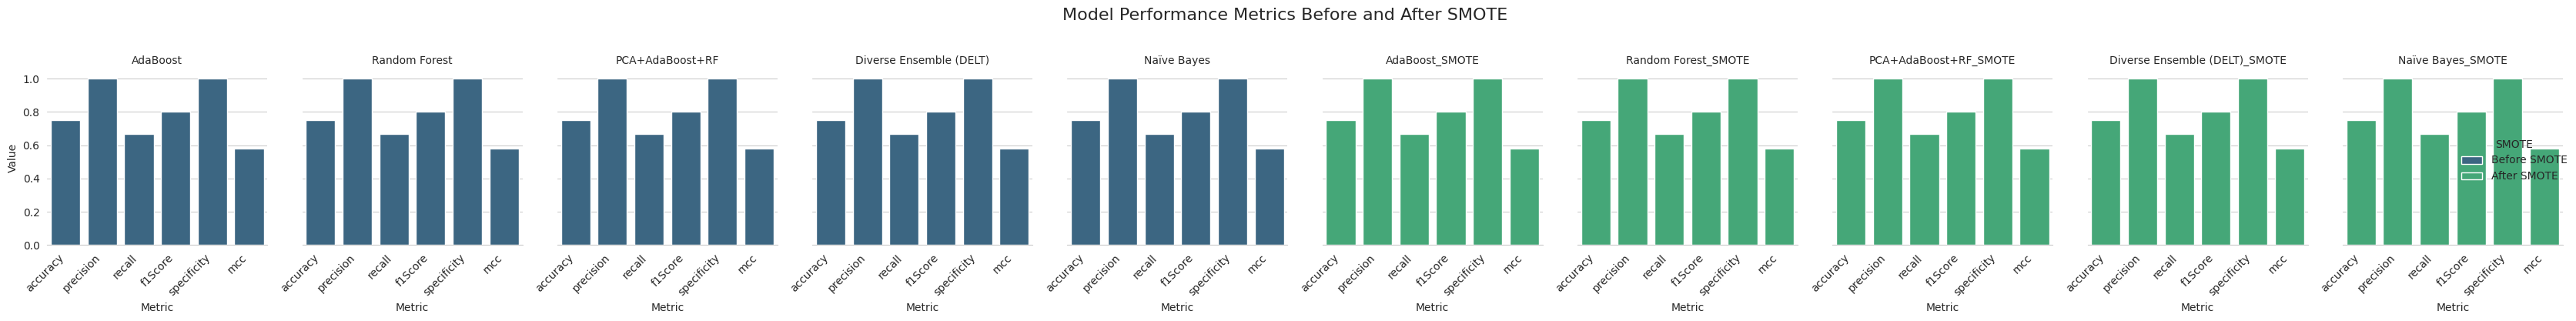

In [33]:
# Combine the DataFrames
df_metrics['SMOTE'] = 'Before SMOTE'
df_metrics_smote['SMOTE'] = 'After SMOTE'

combined_metrics_df = pd.concat([df_metrics, df_metrics_smote])

# Reset index to make model names a column
combined_metrics_df = combined_metrics_df.reset_index().rename(columns={'index': 'Model'})

# Melt the DataFrame for plotting
melted_metrics_df = combined_metrics_df.melt(
    id_vars=['Model', 'SMOTE'],
    var_name='Metric',
    value_name='Value'
)

# Create the bar plot
plt.figure(figsize=(15, 10))
g = sns.catplot(
    data=melted_metrics_df,
    x='Metric',
    y='Value',
    hue='SMOTE',
    col='Model',
    kind='bar',
    palette='viridis',
    height=4,
    aspect=.8
)

# Improve readability
g.fig.suptitle('Model Performance Metrics Before and After SMOTE', y=1.03, fontsize=16)
g.set_titles("{col_name}")
g.set_axis_labels("Metric", "Value")
g.set_xticklabels(rotation=45, ha="right")
g.despine(left=True)
plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout to prevent title overlap
plt.show()

## Summary:

### Data Analysis Key Findings

*   For the specific sample dataset used, applying SMOTE did not result in any observable change in the performance metrics (Accuracy, Precision, Recall, F1-Score, Specificity, MCC) for any of the evaluated models (AdaBoost, Random Forest, PCA+AdaBoost+RF Ensemble, Diverse Ensemble (DELT), and Naïve Bayes). All models showed identical performance metrics before and after SMOTE.
*   The evaluation confusion matrix showed TP=2, TN=1, FP=0, and FN=1 for all models both before and after SMOTE.
*   Despite the identical performance metrics, the SMOTE process successfully resampled the training data, increasing the number of samples from 8 to 10.

### Insights or Next Steps

*   The lack of impact from SMOTE on this specific small sample dataset suggests that the sample data might not adequately represent a typical imbalanced dataset where SMOTE would show a benefit, or the dataset is too small for the resampling to have a significant effect. It would be beneficial to repeat this analysis with a larger, truly imbalanced dataset like the real `nasa_cm1_data.csv` file to observe the expected improvements in Recall and F1-Score.
*   While the current analysis used a fixed set of models and SMOTE parameters, further work could explore tuning the hyperparameters of both the SMOTE algorithm (e.g., `k_neighbors`) and the machine learning models to potentially maximize performance, especially on a more representative dataset.
